# 🔎 Tokenizers (in Deep Learning)

## 📖 Introduction

A tokenizer maps `string` $\rightleftharpoons$ `list of tokens`.
* `encode`("string") $\mapsto$ ["list", "of", "tokens"]
* `decode`(["list", "of", "tokens"]) $\mapsto$ "string"

In DeepLearning/NLP, a token is a unit of text (sequence of characters or bytes) that is often characterized by:
* an <u>index in the vocabulary</u> of tokens,
* a string representer.

The index is used to interpret inputs and/or outputs of a neural network.
<br> It is a positive integer in a limited range, that is often used to index vectorial embeddings.
<br> The *encoding* part is used when the neural net is fed with text data (ex: Language Models).
<br> The *decoding* part is used when the neural net outputs text data (ex: Text Generation with LM, Automatic Speech Recognition, Image Caption Generation, ...).

When extracted from a string, a token can also be characterized the <u>positions in the original string</u> (start & end). <br>
This is needed for application like extractive question answering, where we have to track the position of the answer in the original text to extract it. <br>
(Caution with multi-bytes characters: position in bytes is not the same as position in characters.)

A good tokenizer can compress a string into a small number of tokens,
while keeping a reasonable vocabulary size (number of possible unique tokens). <br>
A popular measure of this efficiency is the <u>fertility</u> of the tokenizer, defined as the average number of tokens per word:
$$\text{fertility} = \frac{\text{number of tokens}}{\text{number of words}}$$

A common problem of having a vocabulary with a limited size (that is hard to grow) is the <u>out-of-vocabulary</u> (OOV) problem. <br>
* Each natural language uses between 100k and 100M words, so it is impossible to have a vocabulary that covers all words.
* Even at the character level there about 150k unicode characters!

A solution to the OOV problem is to work at <u>byte-level</u> (unicode), not character-level. <br>
In state-of-the-art models, tokens are often <u>sub-word tokens</u>, 
* either at byte-level (so a token can be a "sub-character"), 
* or at character-level with a byte-level fallback for unicode characters that are not in the vocabulary.

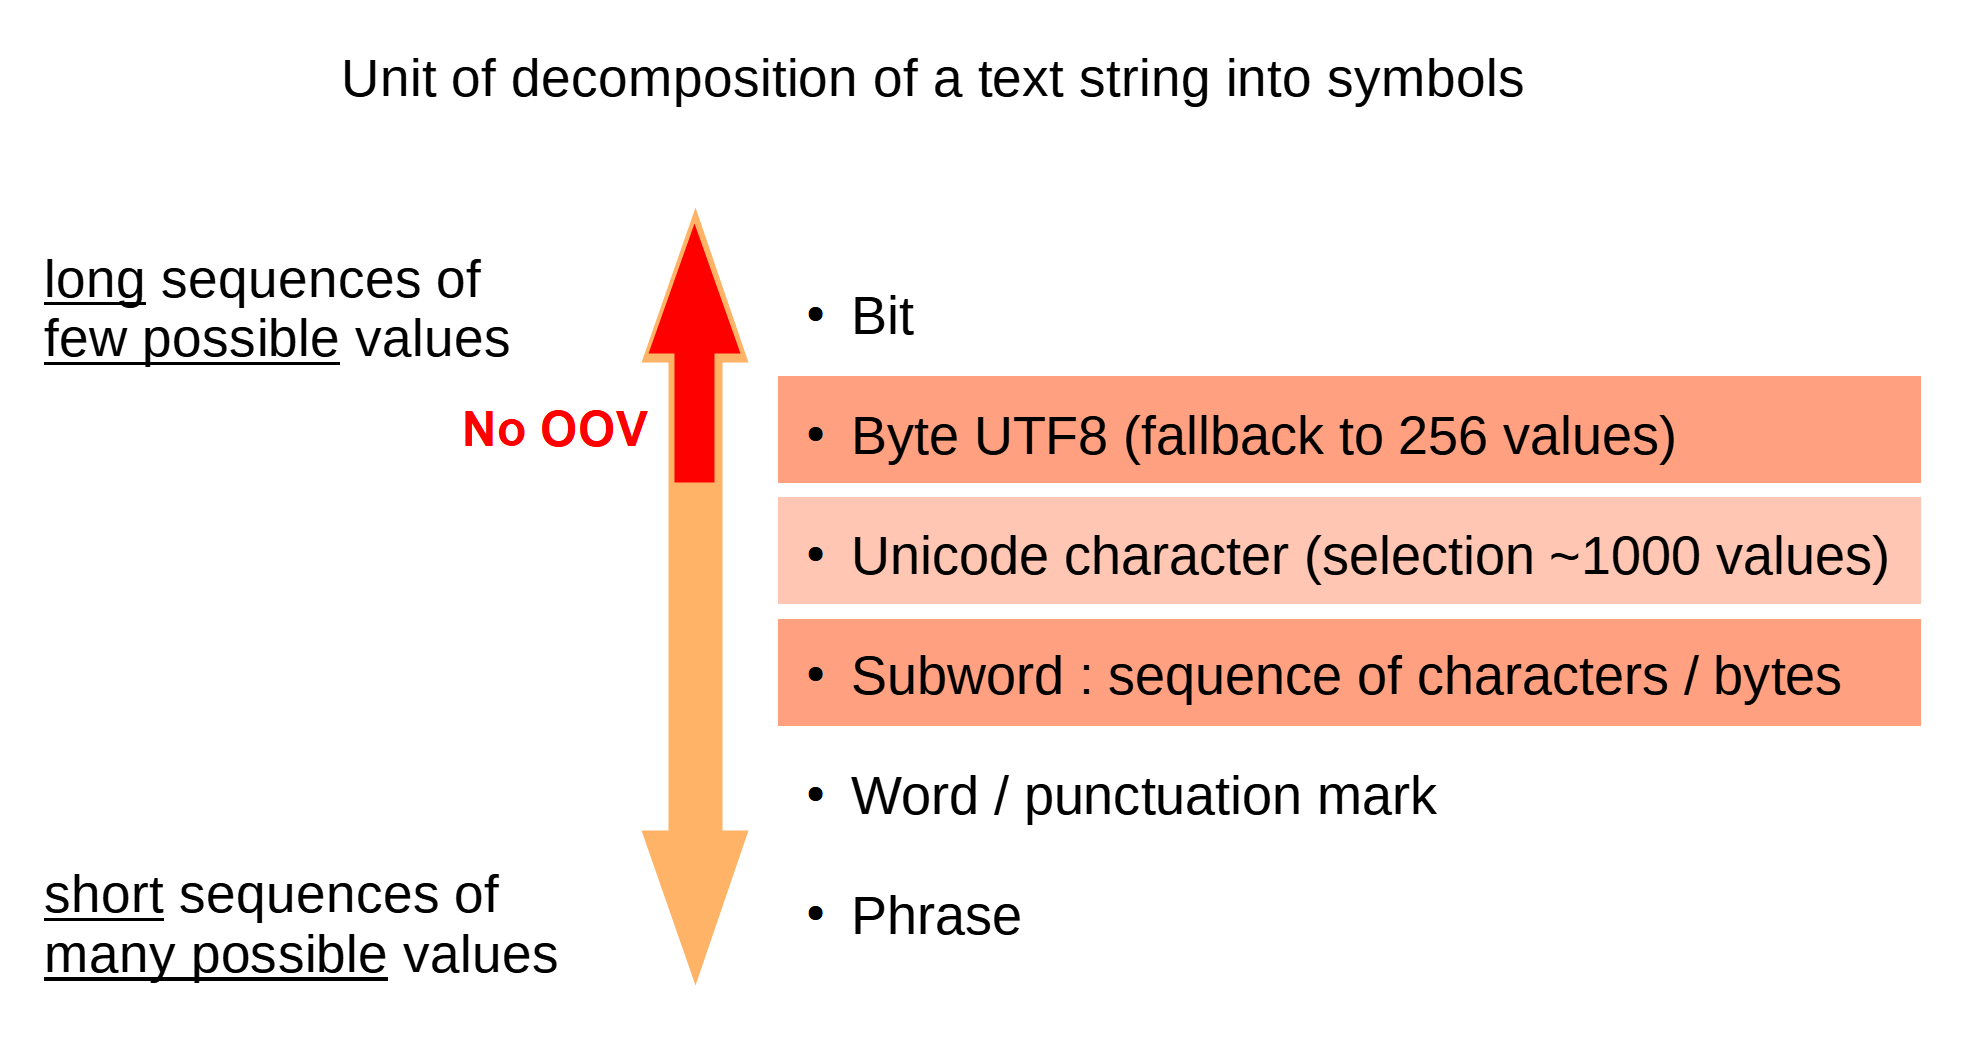

### 📖 Tokenization concept explained with code (tokens=characters/words)
The decomposition of a string into tokens can be illustrated in this small code, where tokens can be words/characters:

In [14]:
class CharSplitter:

    def split(self, text: str) -> list:
        return list(text)

    def join(self, tokens: list) -> str:
        return "".join(tokens)

class WordSplitter:

    _SPACE = "▁"

    def split(self, text: str) -> list:
        words = text.split(" ")
        return ([words[0]] + [self._SPACE+w for w in words[1:]]) if words else []
        
    def join(self, tokens: list) -> str:
        return "".join(tokens).replace(self._SPACE, " ")
        
input = "Mais, mais… vas t'en là-bas !"

for tokenizer in [
    CharSplitter(),
    WordSplitter(),
    ]:

    encoded = tokenizer.split(input)

    # Round-trip test
    encoded_decoded = tokenizer.join(encoded)
    assert encoded_decoded == input
    
    print(f"== {tokenizer.__class__.__name__} ==\n-> {encoded}\n-> {encoded_decoded}\n")

== CharSplitter ==
-> ['M', 'a', 'i', 's', ',', ' ', 'm', 'a', 'i', 's', '…', ' ', 'v', 'a', 's', ' ', 't', "'", 'e', 'n', ' ', 'l', 'à', '-', 'b', 'a', 's', ' ', '!']
-> Mais, mais… vas t'en là-bas !

== WordSplitter ==
-> ['Mais,', '▁mais…', '▁vas', "▁t'en", '▁là-bas', '▁!']
-> Mais, mais… vas t'en là-bas !



This was to show the string decomposition principle.

In reality, tokenizers are more complex when they are used with a neural network model, because of the vocabulary that has a **fixed size**.

In [15]:
class Tokenizer:

    _SOS = "<start>"
    _EOS = "<end>"
    _UNK = "<unk>"
    vocabulary = [_UNK, _SOS, _EOS]
   
    def encode(self, text: str) -> list:
        # Dec
        tokens_str = self.split(text)
        tokens_idx = [
            self.vocabulary.index(t) if t in self.vocabulary
            else self.vocabulary.index(self._UNK)
            for t in tokens_str
        ]
        return tokens_idx
        
    def encode_str(self, text: str) -> list:
        return [self.vocabulary[idx] for idx in self.encode(text)]

class CharTokenizer(Tokenizer, CharSplitter):

    def __init__(self, vocabulary: list = [chr(i) for i in range(128)]):
        self.vocabulary += vocabulary

In [16]:
input = "Mais, mais… vas t'en là-bas !"

tokenizer = CharTokenizer()
encoded = tokenizer.encode(input)
encoded_str = tokenizer.encode_str(input)
encoded_decoded = tokenizer.join(encoded_str)
print(f"{input}\n-> {encoded}\n-> {encoded_str}\n-> {encoded_decoded}")

Mais, mais… vas t'en là-bas !
-> [80, 100, 108, 118, 47, 35, 112, 100, 108, 118, 0, 35, 121, 100, 118, 35, 119, 42, 104, 113, 35, 111, 0, 48, 101, 100, 118, 35, 36]
-> ['M', 'a', 'i', 's', ',', ' ', 'm', 'a', 'i', 's', '<unk>', ' ', 'v', 'a', 's', ' ', 't', "'", 'e', 'n', ' ', 'l', '<unk>', '-', 'b', 'a', 's', ' ', '!']
-> Mais, mais<unk> vas t'en l<unk>-bas !


## 🛠️ Install common librairies

Popular python libraries for tokenizers are:

In [ ]:
# Most popular tokenizer libraries
!pip install tokenizers>=0.20,<0.21 # last version is buggy
!pip install tiktoken #==0.8.0
!pip install sentencepiece #==0.2.0

# Librairies for neural networks that include tokenizers (usually wrap other lower-level tokenization libraries)
!pip install transformers #==4.46.3
# !pip install nemo #==6.0.3
!pip install git+https://github.com/linagora-labs/NeMo.git pytorch_lightning==2.4.0 lhotse==1.28.0
#!python -m pip install git+https://github.com/linagora-labs/NeMo.git@{main}#egg=nemo_toolkit[asr]

Check versions:

In [ ]:
!pip index versions tiktoken 2> /dev/null
!pip index versions tokenizers 2> /dev/null
!pip index versions sentencepiece 2> /dev/null

# !pip index versions transformers 2> /dev/null
# !pip index versions nemo 2> /dev/null

Also useful for this notebook:

In [ ]:
!pip install ftfy
!pip install pandas

## 👨‍💻 Helpers for an inspection of several tokenizers

Define a list of interesting tokenizers, identified either by their tiktoken name or [Hugging Face repository name](https://huggingface.co/docs/huggingface_hub/en/guides/repository).

In [1]:
my_tokenizers = {
    
    # LLM - TikToken
    "GPT 3.5": "gpt-3.5-turbo",
    "GPT 4": "gpt-4",
    
    # LLM - Hugging Face / transformers
    "Gemma": "google/gemma-7b",
    "Phi 2": "microsoft/phi-2",
    "Phi 3": "microsoft/Phi-3-medium-4k-instruct",
    "Qwen": "Qwen/Qwen2.5-7B",
    "Falcon": "tiiuae/falcon-7b",
    "Mistral": "mistralai/Mistral-7B-v0.1",
    "Llama 2": "meta-llama/Llama-2-7b-hf",
    "Llama 3": "meta-llama/Meta-Llama-3-8B-Instruct",
    "Croissant": "croissantllm/CroissantLLMBase",
    "Lucie": "OpenLLM-France/Lucie-7B",  # -> https://huggingface.co/OpenLLM-France/Lucie-7B
    "Bloom": "bigscience/bloom-7b1",
    "Olmo 2": "allenai/OLMo-2-1124-7B-Instruct",
    "C4": "CohereForAI/c4ai-command-r-plus",
    "Aya": "CohereForAI/aya-expanse-8b",
    "Jais": "inceptionai/jais-adapted-7b-chat",
    "EuroLLM": "utter-project/EuroLLM-9B",

    # ASR - Hugging Face / transformers
    "Whisper": "openai/whisper-large-v3",
    # ASR - Hugging Face / nemo
    "Parakeet": "nvidia/parakeet-ctc-1.1b", # same as "nvidia/parakeet-rnnt-1.1b",
    "Perruche": "/home/jlouradour/projects/Parakeet/tokenizer_spe_bpe_v1024/tokenizer.model", # /!!!!\\
}

**Note:** some models (like [Llama](https://huggingface.co/meta-llama/Llama-3.1-8B-Instruct)) might require to fill some agreements form to have access to the model (with your Hugging Face account).<br>
In case of problem, you should have an explicit message with the URL to visit (and fill the form) to get access to the model.


Define some helpers to load and play with tokenizers:

In [2]:
import ftfy # text encoding transformations
import pandas as pd

def load_tokenizer(name):
    """
    Load a tokenizer by name.
    """
    # Conform name
    global my_tokenizers
    if name in my_tokenizers:
        name = my_tokenizers[name]

    # Load with the right library
    # - TikToken
    if name.lower().startswith("gpt"):
        import tiktoken
        return tiktoken.encoding_for_model(name.lower())
    # - SentencePiece
    elif name.endswith(".model"):
        import sentencepiece as spm
        return spm.SentencePieceProcessor(model_file=name)
    # - NeMo
    elif name.lower().startswith("nvidia"):
        import nemo.collections.asr as nemo_asr
        import logging
        logging.getLogger('nemo_logger').setLevel(logging.ERROR)
        if "ctc" in name:
            nemo_model_class = nemo_asr.models.EncDecCTCModelBPE
        elif "rnn" in name:
            nemo_model_class = nemo_asr.models.EncDecRNNTBPEModel
        else:
            raise NotImplementedError(f"NeMo model '{name}' not supported")
        model = nemo_model_class.from_pretrained(name)
        return model.tokenizer.tokenizer
    # - Transformers
    else:
        import transformers
        try:
            return transformers.AutoTokenizer.from_pretrained(name, trust_remote_code=True)
        except Exception as err:
            # Report the name in case of error
            raise RuntimeError(f"Could not load tokenizer '{name}': {err}") from err

def load_tokenizer_with_cache(name):
    """
    Load a tokenizer by name, with cache.
    """
    global _loaded_tokenizers
    if name not in _loaded_tokenizers:
        _loaded_tokenizers[name] = load_tokenizer(name)
    return _loaded_tokenizers[name] 

if "_loaded_tokenizers" not in globals():
    _loaded_tokenizers = {}


def get_token_representer(tokenizer, idx, if_negative="<BOS>"):
    """
    Get the token string corresponding to an index.
    """
    if isinstance(tokenizer, str):
        tokenizer = load_tokenizer_with_cache(tokenizer)
    if idx < 0: return if_negative
    
    representer = ""
    if "id_to_token" in dir(tokenizer):
        representer = tokenizer.id_to_token(idx)
    elif "convert_ids_to_tokens" in dir(tokenizer):
        representer = tokenizer.convert_ids_to_tokens([idx])
    try:
        decoded = tokenizer.decode([idx], skip_special_tokens=False)
    except Exception as err:
        decoded = tokenizer.decode([idx])
    while isinstance(representer, list):
        assert len(representer) == 1
        representer = representer[0]
    while isinstance(decoded, list):
        assert len(decoded) == 1
        decoded = decoded[0]
    representer = normalize_for_display(representer, is_token=True)
    decoded = normalize_for_display(decoded, is_token=True)
    if not decoded.startswith("▁") and representer.startswith("▁"):
        decoded = "▁" + decoded
    return decoded    

def encode_decode(tokenizer, text, add_special_tokens=True):
    """
    Round-trip testing:
    Encode an input text into a list of tokens, and decode the tokens back to a string.
    """
    if isinstance(tokenizer, str):
        tokenizer = load_tokenizer_with_cache(tokenizer)

    if "encode_batch" in dir(tokenizer):
        # TikToken
        tokens = tokenizer.encode_batch(
            [text],
            allowed_special="all" if add_special_tokens else set(),
            disallowed_special=()
        )[0]
        if hasattr(tokens, "ids"):
            tokens = tokens.ids
        decoded = tokenizer.decode(tokens)
    elif "SentencePiece" in type(tokenizer).__name__:
        # SentencePiece
        tokens = tokenizer.encode(text,
            add_bos=add_special_tokens,
            add_eos=add_special_tokens,
            emit_unk_piece=add_special_tokens,
        )
        decoded = tokenizer.decode([t for t in tokens if t >= 0])
        # tokens_strings = tokenizer.encode(text,
        #     out_type=str,
        #     emit_unk_piece=add_special_tokens,
        # )
    else:
        # transformers / tokenizers
        tokenizer.add_eos_token = bool(add_special_tokens)
        tokens = tokenizer.encode(text, add_special_tokens=add_special_tokens)
        decoded = tokenizer.decode(tokens, skip_special_tokens=not add_special_tokens)
    
    tokens_strings = [get_token_representer(tokenizer, idx, "<BOS>" if i == 0 else "<SOS>") for i, idx in enumerate(tokens)]

    # Normalize for display
    tokens_strings = normalize_for_display(tokens_strings, is_token=True)
    norm_decoded = normalize_for_display(decoded)

    return tokens, tokens_strings, decoded, norm_decoded


def vocabulary_size(tokenizer, to_string=False):
    """
    Get the vocabulary size of a tokenizer.
    """
    if isinstance(tokenizer, str):
        tokenizer = load_tokenizer_with_cache(tokenizer)
    
    N = None
    for attr_name in "n_vocab", "vocab_size":
        if attr_name in dir(tokenizer):
            N = getattr(tokenizer, attr_name)
            if not isinstance(N, int):
                assert callable(N)
                N = N()
            break
    if not N:
        raise NotImplementedError(f"Vocabulary not supported for tokenizer '{tokenizer}'")
    if to_string:
        N = format_thoushands(N)
    return N

def format_thoushands(N):
    import math
    if N < 1100:
        return str(N)
    if N - 1000 * math.floor(N/1000) < 100:
        return f"{N//1000}k"
    return f"{N/1000:.1f}k"

def get_vocabulary(tokenizer):
    """
    Get the vocabulary of a tokenizer.
    """
    if isinstance(tokenizer, str):
        tokenizer = load_tokenizer_with_cache(tokenizer)

    N = vocabulary_size(tokenizer)
    try:
        tokens_str = [tokenizer.decode([t], skip_special_tokens=False) for t in range(N)]
    except Exception as err:
        tokens_str = [normalize_for_display(tokenizer.decode([t]), is_token=True) for t in range(N)]
    if "id_to_piece" in dir(tokenizer):
        tokens_str_check = [normalize_for_display(tokenizer.id_to_piece(t), is_token=True) for t in range(N)]
        for i, (t1, t2) in enumerate(zip(tokens_str, tokens_str_check)):
            if t1 != t2:
                if not t1.startswith("▁") and t2.startswith("▁"):
                    tokens_str[i] = "▁" + tokens_str[i]
    
    tokens_str = [normalize_for_display(tok, is_token=True) for tok in tokens_str]
    return tokens_str


def sorted_vocabulary(vocab):
    if isinstance(vocab, str):
        vocab = get_vocabulary(vocab)
    tokens_by_length = {}
    for token in sorted(vocab):
        nchars = len(token.lstrip("▁"))
        sow = token.startswith("▁")
        key = (nchars, sow)
        if key not in tokens_by_length:
            tokens_by_length[key] = []
        tokens_by_length[key].append(token)

    data = []
    for (nchars, sow) in sorted(tokens_by_length):
        tokens = sorted(tokens_by_length[(nchars, sow)])
        data.append({
            "nchars": nchars,
            "start": "▶" if sow else "#…",
            "#tokens": len(tokens),
            "tokens": tokens # normalize_for_display(tokens, is_token=True),
        })

    data.append({
        "nchars": "TOTAL",
        "start": "",
        "#tokens": sum(d["#tokens"] for d in data),
        "tokens": "",
    })
    
    return pd.DataFrame(data)

# Will be defined later
if "normalize_for_display" not in globals():
    def normalize_for_display(text, *kargs, **kwargs):
        return text

Below are some helpers to display things nicely. <br>
There is a special treatment for string including both Arabic and latin characters (so that characters are displayed in the right order).

In [3]:
def normalize_for_display(text, is_token=False, fix_arabic=True):
    """
    Normalize token/text for display.
    """
    if isinstance(text, list):
        
        if is_token:
            token_list = [normalize_for_display(t, is_token=is_token, fix_arabic=False) for t in text]
            # Add a separator between tokens
            return fix_arabic_display("┃".join(token_list))
        else:
            # Map function on each element
            return [normalize_for_display(t, is_token=is_token, fix_arabic=fix_arabic) for t in text]
    
    # Escape line breaks and tabs
    text = text \
        .replace("\n", "\\n") \
        .replace("\t", "\\t") \
        .replace("\r", "\\r") \
        .replace(" ", "⍽") # non-break spaces
    
    if is_token:
        # Standard representation of whitespace
        text = text \
            .replace(" ", "▁") \
            .replace("Ġ", "▁")
    
    # For non-ASCII characters that are NOT encoded in UTF-8
    # "Ã©" -> "é", ...
    # It happens with the token "representation strings" for byte-level models like Bloom, Qwen, Falcon, Llama 2, Olmo 2, C4, Aya 
    # if tokens are not decoded (should be deprecated with correct implementation)
    if "Ã" in text or "â" in text:
        text = ftfy.fix_text(text, normalization="NFC")
    
    # Special tokens
    for special_in, special_out in {
        # Mistral, Llama 2
        "<s>": "<BOS>", "</s>": "<EOS>",
        # C4, Aya
        "<BOS_TOKEN>": "<BOS>", "<|END_OF_TURN_TOKEN|>": "<EOS>",
        # Llama 3
        "<|begin_of_text|>": "<BOS>", "<|end_of_text|>": "<EOS>",
        # Gemma
        "<bos>": "<BOS>", "<eos>": "<EOS>",
        # Whisper
        "<|startoftranscript|>": "<BOS>", "<|endoftext|>": "<EOS>",
        # Nemo
        "⁇": "<UNK>",
        # misc. tags
        "<|": "<", "|>": ">",
    }.items():
        text = text.replace(special_in, special_out)
    
    if fix_arabic:
        text = fix_arabic_display(text)

    return text

# from bidi.algorithm import get_display # Did not find a good thing in python-bidi (?)

# Unicode characters for Right-to-Left Mark (RLM) and Left-to-Right Mark (LRM)
_RLM = '\u200F'
_LRM = '\u200E'

def is_separator(char):
    return char in "┃"

def is_arabic(char, or_separator=True):
    return (ord(char) in range(0x600, 0x6ff)) or (is_separator(char) if or_separator else False)

def is_word(char):
    return char.isalpha() or char in "؟،"

def contains_arabic(text):
    return any(is_arabic(c, or_separator=False) for c in text)

def contains_latin(text):
    return any(not is_arabic(c) and is_word(c) for c in text)

def fix_arabic_display(input, verbose=False):
    """
    Format a string with Arabic and latin characters (code-switching) for a good display in the notebook.
    """
    if isinstance(input, list):
        return [fix_arabic_display(i) for i in input]
    
    # Ignore already converted text
    if _RLM in input or _LRM in input:
        return input
    # Convert only code-switching text
    if not contains_arabic(input) or not contains_latin(input):
        if contains_arabic(input):
            input = _RLM + input
        return input
    
    if not input: return ""

    if verbose:
        print(f"Fixing display for: {input}")

    is_current_arabic = is_arabic(input[0])
    chunks_by_language = [
        _RLM if is_current_arabic else _LRM
    ]
    is_space = False
    must_add_extra_space = False


    for c in input:
        was_previous_arabic = is_current_arabic
        is_current_arabic = is_arabic(c)
        # Special treatment for space (have to be in Arabic chunks)
        was_previous_space = is_space
        is_space = (c == " ")
        if is_space:
            is_current_arabic = True
        if is_current_arabic != was_previous_arabic:
            if must_add_extra_space:
                chunks_by_language[-1] += " "
            # Add direction switch mark before the character
            chunks_by_language.append(_RLM if is_current_arabic else _LRM)
            # Add an extra space before the code-switching
            must_add_extra_space = was_previous_space

        chunks_by_language[-1] += c

    if must_add_extra_space:
        chunks_by_language[-1] += " "

    # Reverse the chunk order
    chunks_by_language = chunks_by_language[::-1]

    # Put separators on the other side (they are affected to Arabic segments)
    for i, chunk in enumerate(chunks_by_language):
        if is_separator(chunk[-1]) and not is_separator(chunk[0]):
            chunks_by_language[i] = chunk[-1] + chunk[:-1]

    return "".join(chunks_by_language)


if "TEST":
    title = "☪ Test: Fix of display for text with Arabic and code-switching ☪"
    print(f"{title}\n" + "-"*(len(title)+2))

    input = "مرحباً Jean-Pierre، كيف حالك؟"
    inputs = [
        input,
        "Jean-Pierre، كيف حالك؟",
        "مرحباً Jean-Pierre",
        # input.replace("،", ",").replace("؟", "?"),
        # "مرحباً أحمد، كيف حالك؟",
        # "Bonjour Jean-Pierre, comment ça va?",
    ]
    inputs_for_display = [fix_arabic_display(i) for i in inputs]

    for i, (input, display_input) in enumerate(zip(inputs, inputs_for_display)):
        if i > 0:
            print("\n", display_input)
            continue

        print("➡️ Original string")
        print(input)
        print("➡️ String for display")
        print(display_input)
        print("➡️ Word decomposition (of original string)")
        for i, word in enumerate(input.split()):
            print(f" {i+1:2d}- {fix_arabic_display(word)}")

        # # Uncomment for debugging (see all characters encoded, one by line)
        # print("➡️ Character decomposition (of string for display):")
        # for i, c in enumerate(display_input):
        #     c = c.replace(_RLM, "<RLM>").replace(_LRM, "<LRM>")
        #     print(f" {i+1:2d}- {c}")

pd.DataFrame({
    "Original": inputs,
    "Display": inputs_for_display,
    "Display of tokens": [normalize_for_display(input.split(), is_token=True) for input in inputs],
})

☪ Test: Fix of display for text with Arabic and code-switching ☪
------------------------------------------------------------------
➡️ Original string
مرحباً Jean-Pierre، كيف حالك؟
➡️ String for display
‏، كيف حالك؟‎Jean-Pierre ‏مرحباً 
➡️ Word decomposition (of original string)
  1- ‏مرحباً
  2- ‏،‎Jean-Pierre
  3- ‏كيف
  4- ‏حالك؟

 ‏، كيف حالك؟‎Jean-Pierre

 ‎Jean-Pierre ‏مرحباً 


,Original,Display,Display of tokens
0,مرحباً Jean-Pierre، كيف حالك؟,‏، كيف حالك؟‎Jean-Pierre ‏مرحباً,‏،┃كيف┃حالك؟‎Jean-Pierre┃‏مرحباً
1,Jean-Pierre، كيف حالك؟,‏، كيف حالك؟‎Jean-Pierre,‏،┃كيف┃حالك؟‎Jean-Pierre
2,مرحباً Jean-Pierre,‎Jean-Pierre ‏مرحباً,‎Jean-Pierre┃‏مرحباً


Test the tokenizer download / loading (which can be long 🥱):

In [4]:
for tokenizer in my_tokenizers:
    load_tokenizer_with_cache(tokenizer)

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


Test encoding and decoding with a simple string with a tokenizer:

In [20]:
for output in encode_decode(
    "Llama 3", # tokenizer
    "Bonjour à tous !" # input
    ):
    print("➡️", output)

➡️ [128000, 82681, 3869, 26725, 758]
➡️ <BOS>┃Bonjour┃▁à┃▁tous┃▁!
➡️ <|begin_of_text|>Bonjour à tous!
➡️ <BOS>Bonjour à tous!


## 👀 See what happens

Use `pandas` library (just to diplay tables later):

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'left') # WTF ? this does not work
# pd.set_option('display.show_index', False) # Is there an option to avoid printing the index column of DataFrame?

### 🧪📚 See vocabulary of (small) tokenizers

In [6]:
sorted_vocabulary("Parakeet")

,nchars,start,#tokens,tokens
0,0,▶,1,[▁]
1,1,#…,27,"[', a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z]"
2,1,▶,25,"[▁', ▁a, ▁b, ▁c, ▁d, ▁e, ▁f, ▁g, ▁h, ▁i, ▁j, ▁k, ▁l, ▁m, ▁n, ▁o, ▁p, ▁r, ▁s, ▁t, ▁u, ▁v, ▁w, ▁y, ▁z]"
3,2,#…,119,"[ab, ac, ad, ag, ah, ak, al, am, an, ap, ar, as, at, av, ay, be, ce, ch, ci, ck, co, ct, cy, de, du, ed, ef, el, em, en, ep, er, es, et, ew, fe, ff, ft, ge, gg, gn, ht, ia, ib, ic, id, ie, if, ig, il, im, in, ip, ir, is, it, iv, ix, iz, ke, ks, ld, le, li, ll, ly, me, mo, na, nd, ne, nt, od, og, ol, om, on, oo, op, or, os, ot, ou, ow, oy, pe, ph, pl, pp, ps, pt, qu, ra, re, ri, ro, ru, ry, se, so, ...]"
4,2,▶,114,"[▁ab, ▁ac, ▁ad, ▁af, ▁ag, ▁ah, ▁al, ▁am, ▁an, ▁ap, ▁ar, ▁as, ▁at, ▁be, ▁bl, ▁bo, ▁br, ▁bu, ▁by, ▁ca, ▁ch, ▁cl, ▁co, ▁cr, ▁de, ▁do, ▁dr, ▁ed, ▁el, ▁em, ▁en, ▁es, ▁eu, ▁ev, ▁ex, ▁fa, ▁fe, ▁fl, ▁fo, ▁fr, ▁gl, ▁go, ▁gr, ▁gu, ▁ha, ▁he, ▁ho, ▁hu, ▁if, ▁im, ▁in, ▁is, ▁it, ▁jo, ▁ke, ▁kn, ▁la, ▁le, ▁li, ▁lo, ▁ma, ▁me, ▁mo, ▁mr, ▁mu, ▁my, ▁ne, ▁no, ▁ob, ▁of, ▁oh, ▁ok, ▁on, ▁op, ▁or, ▁pa, ▁pe, ▁ph, ▁pl, ▁po, ▁pr, ▁qu, ▁ra, ▁re, ▁ro, ▁sa, ▁sc, ▁se, ▁sh, ▁sk, ▁sl, ▁sm, ▁so, ▁sp, ▁st, ▁su, ▁sy, ▁ta, ▁te, ▁th, ...]"
5,3,#…,151,"[ace, ach, ack, act, ade, ady, age, ail, aim, ain, all, als, ame, and, ang, ank, ans, ant, ard, are, ark, ars, art, ary, ase, ash, ass, ast, ate, ath, ave, ber, ble, ced, ces, con, cri, cus, day, der, ead, ect, ell, ens, ent, ere, erm, ers, ert, ess, est, ets, ety, ful, ger, her, hip, ial, ian, ice, ich, ick, ics, ict, ide, ied, ies, iew, iff, igh, ign, ild, ile, ill, ily, ind, ine, ing, ink, int, ion, ire, ise, ish, iss, ist, ite, ith, its, itt, ity, ive, ize, kes, led, les, lic, lud, nce, nds, ...]"
6,3,▶,174,"[▁acc, ▁act, ▁add, ▁adv, ▁all, ▁and, ▁any, ▁app, ▁are, ▁arg, ▁art, ▁ask, ▁ass, ▁att, ▁aut, ▁bas, ▁bec, ▁beg, ▁beh, ▁bel, ▁bet, ▁big, ▁bit, ▁bra, ▁bre, ▁bus, ▁but, ▁can, ▁car, ▁che, ▁cle, ▁col, ▁com, ▁con, ▁cor, ▁cou, ▁cre, ▁cur, ▁day, ▁dec, ▁def, ▁des, ▁det, ▁did, ▁dis, ▁don, ▁ear, ▁eas, ▁eff, ▁ele, ▁end, ▁eng, ▁ent, ▁exp, ▁ext, ▁fam, ▁far, ▁few, ▁fin, ▁fir, ▁for, ▁fun, ▁gen, ▁get, ▁god, ▁got, ▁gra, ▁had, ▁has, ▁hel, ▁her, ▁him, ▁his, ▁hon, ▁how, ▁hum, ▁ide, ▁imp, ▁inc, ▁ind, ▁inf, ▁ins, ▁int, ▁inv, ▁iss, ▁its, ▁jud, ▁lar, ▁law, ▁leg, ▁let, ▁loc, ▁lot, ▁man, ▁mar, ▁may, ▁med, ▁mem, ▁met, ▁min, ...]"
7,4,#…,75,"[able, ably, aint, ally, alth, ance, ange, arch, ason, atch, ated, ater, ates, ause, blem, body, cept, cess, cial, ence, ense, ents, enty, ered, eric, ever, fore, form, hing, ible, ical, ices, ient, ific, ight, ines, ings, ions, ious, ited, ject, king, llow, ment, nder, ness, ning, olog, oney, onna, osed, ough, ould, ound, ount, ouse, ower, pect, ract, reat, ress, ross, self, stem, ther, ting, ular, ures, vern, vers, very, ving, ward, ways, ween]"
8,4,▶,158,"[▁able, ▁also, ▁appe, ▁away, ▁back, ▁been, ▁best, ▁book, ▁both, ▁call, ▁came, ▁care, ▁case, ▁cent, ▁char, ▁coll, ▁come, ▁comm, ▁comp, ▁conc, ▁conf, ▁cons, ▁cont, ▁cour, ▁didn, ▁diff, ▁dire, ▁dist, ▁does, ▁done, ▁down, ▁each, ▁even, ▁ever, ▁exam, ▁expl, ▁fact, ▁feel, ▁find, ▁five, ▁form, ▁four, ▁frie, ▁from, ▁full, ▁give, ▁good, ▁hand, ▁happ, ▁hard, ▁have, ▁head, ▁hear, ▁help, ▁here, ▁high, ▁home, ▁hund, ▁inst, ▁into, ▁just, ▁keep, ▁kind, ▁know, ▁last, ▁lead, ▁lear, ▁left, ▁life, ▁like, ▁list, ▁long, ▁look, ▁love, ▁made, ▁make, ▁many, ▁mark, ▁mean, ▁miss, ▁more, ▁most, ▁move, ▁much, ▁must, ▁name, ▁need, ▁next, ▁okay, ▁once, ▁only, ▁open, ▁over, ▁part, ▁pass, ▁peop, ▁pers, ▁plan, ▁play, ▁poss, ...]"
9,5,#…,26,"[ately, ather, ating, ation, ative, atter, ature, ction, erest, ether, ident, ility, iness, ision, ities, ition, ittle, ments, other, ought, ready, thing, ually, uring, ution, velop]"


In [7]:
sorted_vocabulary("Perruche")

,nchars,start,#tokens,tokens
0,0,▶,1,[▁]
1,1,#…,40,"[', -, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z, à, â, ç, è, é, ê, ë, î, ï, ô, ù, û]"
2,1,▶,26,"[▁a, ▁b, ▁c, ▁d, ▁e, ▁f, ▁g, ▁h, ▁i, ▁j, ▁k, ▁l, ▁m, ▁n, ▁o, ▁p, ▁r, ▁s, ▁t, ▁u, ▁v, ▁w, ▁y, ▁z, ▁à, ▁é]"
3,2,#…,125,"[ab, ac, ad, ag, ai, al, am, an, ap, ar, as, at, au, av, ay, aî, be, ce, ch, ci, ct, cu, cé, de, di, du, dé, el, em, en, er, es, eu, ez, ff, fi, fs, ge, gn, gu, ic, ie, if, ig, il, im, in, ir, is, it, je, la, le, li, ll, lo, ls, là, lè, lé, mb, me, mi, mp, mé, ne, ob, oc, og, oi, ol, om, on, op, or, os, ot, ou, oy, pe, ph, pp, pr, pt, qu, ra, re, ri, ré, se, si, ta, te, th, ti, tr, ts, tt, tu, té, ...]"
4,2,▶,110,"[▁ab, ▁ac, ▁ad, ▁ag, ▁ah, ▁ai, ▁al, ▁am, ▁an, ▁ap, ▁ar, ▁as, ▁au, ▁av, ▁ba, ▁be, ▁bi, ▁bl, ▁br, ▁ca, ▁ce, ▁ch, ▁cl, ▁co, ▁cr, ▁cô, ▁de, ▁di, ▁dr, ▁du, ▁dé, ▁en, ▁es, ▁et, ▁eu, ▁ex, ▁fa, ▁fi, ▁fr, ▁gr, ▁he, ▁hm, ▁id, ▁il, ▁im, ▁in, ▁je, ▁ju, ▁la, ▁le, ▁li, ▁lu, ▁là, ▁ma, ▁me, ▁mi, ▁mo, ▁mé, ▁ne, ▁ni, ▁no, ▁né, ▁ob, ▁oc, ▁oh, ▁on, ▁op, ▁or, ▁ou, ▁où, ▁pa, ▁pe, ▁ph, ▁pi, ▁pl, ▁po, ▁pr, ▁qu, ▁ra, ▁re, ▁ri, ▁ré, ▁sa, ▁sc, ▁se, ▁si, ▁so, ▁sp, ▁st, ▁su, ▁sy, ▁sé, ▁sû, ▁ta, ▁te, ▁th, ▁ti, ▁tr, ▁tu, ▁té, ...]"
5,3,#…,151,"[ace, act, age, agn, ain, ais, ait, ale, all, ame, anc, and, ang, ans, ant, ard, ari, ass, ati, ats, aut, aux, ble, bre, cer, ces, che, ché, cin, cip, cle, cti, cul, dem, der, des, dre, end, ens, ent, ers, ert, euf, eur, eux, gne, hui, ici, ien, ier, ies, ign, ill, ine, ing, ins, ion, ise, iss, ist, itu, ité, jet, ler, les, lic, lig, lle, lui, mer, mes, min, mis, mps, ner, nes, oin, oir, ois, oit, ole, olu, omb, omp, ond, one, ong, onn, ons, ont, ord, ore, orm, ors, ort, ose, oup, our, ous, out, ...]"
6,3,▶,166,"[▁acc, ▁aff, ▁ain, ▁all, ▁ann, ▁ans, ▁app, ▁arr, ▁ass, ▁att, ▁auc, ▁aus, ▁aut, ▁aux, ▁ave, ▁bah, ▁ben, ▁bes, ▁bon, ▁bou, ▁cap, ▁car, ▁cas, ▁ces, ▁cet, ▁cha, ▁che, ▁cin, ▁cli, ▁com, ▁con, ▁cor, ▁cou, ▁cré, ▁dem, ▁der, ▁des, ▁dev, ▁dis, ▁dit, ▁dix, ▁don, ▁dou, ▁déb, ▁déc, ▁déf, ▁déj, ▁dém, ▁dép, ▁eff, ▁emp, ▁enc, ▁enf, ▁ens, ▁ent, ▁env, ▁esp, ▁ess, ▁est, ▁euh, ▁eur, ▁eux, ▁exe, ▁exp, ▁fam, ▁fem, ▁fer, ▁fil, ▁fin, ▁fon, ▁for, ▁fut, ▁gra, ▁gén, ▁hab, ▁hom, ▁hum, ▁ici, ▁ils, ▁imp, ▁inc, ▁inf, ▁ins, ▁jam, ▁jou, ▁jus, ▁les, ▁lui, ▁mad, ▁mal, ▁man, ▁mar, ▁mer, ▁mes, ▁mil, ▁min, ▁mis, ▁moi, ▁mom, ▁mon, ...]"
7,4,#…,88,"[able, ages, agne, aine, ains, aire, aiss, ales, alis, ance, ande, ange, anis, ante, ants, arde, asse, atre, cher, ches, coup, dent, duit, elle, ence, ends, enir, enne, ense, ente, ents, eure, eurs, euse, iens, ille, ingt, ions, ique, iste, iter, ités, ième, ière, jour, lier, lles, lopp, mble, ment, mple, nent, oins, oire, olog, onne, onom, orte, orti, oses, otre, ours, ouve, près, puis, quer, ques, quoi, rais, rait, rent, ress, sion, tant, tion, tout, tres, ttre, uite, ures, veau, vent, vers, voir, vous, ères, êtes, être]"
8,4,▶,134,"[▁alle, ▁appr, ▁arri, ▁avec, ▁avez, ▁beau, ▁bien, ▁cela, ▁cent, ▁cert, ▁ceux, ▁char, ▁cher, ▁chez, ▁cinq, ▁comb, ▁comm, ▁comp, ▁conc, ▁conf, ▁conn, ▁cons, ▁cont, ▁coup, ▁cour, ▁côté, ▁dans, ▁dern, ▁deux, ▁dieu, ▁diff, ▁dire, ▁doit, ▁donc, ▁donn, ▁dont, ▁déjà, ▁effe, ▁elle, ▁ense, ▁fais, ▁fait, ▁faut, ▁fois, ▁fond, ▁form, ▁fran, ▁gens, ▁gros, ▁hein, ▁hist, ▁indi, ▁inté, ▁jour, ▁leur, ▁long, ▁lors, ▁main, ▁mais, ▁mois, ▁mont, ▁mort, ▁même, ▁neuf, ▁nous, ▁parf, ▁part, ▁pass, ▁pays, ▁pens, ▁pers, ▁peti, ▁peut, ▁peux, ▁plan, ▁plus, ▁plut, ▁poin, ▁poli, ▁pour, ▁pouv, ▁pres, ▁prin, ▁pris, ▁prob, ▁prof, ▁prop, ▁prés, ▁puis, ▁quar, ▁quel, ▁ques, ▁quoi, ▁rais, ▁rapp, ▁repr, ▁retr, ▁rien, ▁sain, ▁sais, ...]"
9,5,#…,25,"[ables, aient, aines, aires, alité, ances, anger, ation, ature, ction, endre, eures, ieurs, ilité, iques, jourd, jours, lique, ments, ouver, ouvez, sible, sieur, tions, tique]"


### 🧪𖡎 See how tokenizers do tokenize strings

In [16]:
import re

def test_tokenizers_on_text(
        text,
        tokenizers=my_tokenizers,
        display_vocabulary_size=True,
        display_fertility=True,
        display_round_trip_result=True,
        ):
    if isinstance(tokenizers, str):
        tokenizers = [tokenizers]
    # Build a table with the encoded and decoded text for each tokenizer
    has_comments = False
    all_data = []
    for tokenizer in tokenizers:
        tokens, tokens_str, decoded_raw, decoded = encode_decode(tokenizer, text)
        data = {
            "tokenizer": tokenizer,
        }
        if display_vocabulary_size:
            data["size"] = vocabulary_size(tokenizer, True)
        if display_fertility:
            num_words = len(text.split())
            num_tokens = len(tokens)
            if tokens_str.startswith("<BOS>"):
                num_tokens -= 1
            if tokens_str.endswith("<EOS>"):
                num_tokens -= 1
            data["#tokens"] = num_tokens
            data["fert."] = round(num_tokens / num_words, 1)
        if display_round_trip_result:
            # Remove all tags in brackets (like <BOS>, <EOS>, <UNK>, ...)
            normalized_decoded = re.sub(r"<[^>]*>", "", decoded_raw).strip()
            text_strip = text.strip()
            round_trip_ok = (normalized_decoded == text_strip)
            
            # Spot difference in the round-trip test in case of failure
            diff_string = ""
            if not round_trip_ok:
                start1 = 0
                start2 = 0
                while start1 < len(text_strip) and start2 < len(normalized_decoded) and text_strip[start1] == normalized_decoded[start2]:
                    start1 += 1
                    start2 += 1
                end1 = len(text_strip)
                end2 = len(normalized_decoded)
                while end1 > start1 and end2 > start2 and text_strip[end1-1] == normalized_decoded[end2-1]:
                    end1 -= 1
                    end2 -= 1

                orig = cut_long_string(normalize_for_display(text_strip[start1:end1], is_token=True), 10)
                new = cut_long_string(normalize_for_display(normalized_decoded[start2:end2], is_token=True), 10)

                if "<UNK>" in decoded:
                    diff_string = "OOV"
                elif not orig:
                    diff_string = f"'{new}' added (char {start2+1}/{len(normalized_decoded)})"
                elif not new:
                    diff_string = f"'{orig}' removed (char {start1+1}/{len(text_strip)})"
                else:
                    diff_string += "«"
                    diff_string += orig
                    diff_string += "» ≠ «"
                    diff_string += new
                    diff_string += "»"
            
            # Look if there are weird mixed tokens
            weird_tokens = ""
            _descr_mix_punc = "mix alpha/punct"
            _descr_mix_num = "mix alpha/num"
            _descr_more_than_1_digits = "digits"
            for t in tokens_str.split("┃"):
                t = t.replace("\\n", "\n").replace("\\t", "\t").replace("\\r", "\r") # grrr
                # mix of alphanum and punctuation
                if _descr_mix_punc not in weird_tokens and any(c.isalnum() for c in t) and any(c in ".,;:!?…\n\t" for c in t):
                    if weird_tokens: weird_tokens += ", "
                    weird_tokens += _descr_mix_punc
                # mix of alpha and numeric
                if _descr_mix_num not in weird_tokens and any(c.isalpha() for c in t) and any(c.isdigit() for c in t):
                    if weird_tokens: weird_tokens += ", "
                    weird_tokens += _descr_mix_num
                # more than one digit
                if _descr_more_than_1_digits not in weird_tokens and sum(c.isdigit() for c in t) > 1:
                    if weird_tokens: weird_tokens += ", "
                    weird_tokens += _descr_more_than_1_digits

            is_ok = (round_trip_ok and not weird_tokens)
            if not is_ok:
                has_comments = True

            data["round-trip"] = "✅" if is_ok else (f"❌" if not round_trip_ok else f"⚠️")
            data["comment"] = diff_string if not round_trip_ok else weird_tokens
        data["encoded tokens"]= cut_long_string(tokens_str)
        data["decoded text"]= cut_long_string(decoded)
        all_data.append(data)

    all_data = pd.DataFrame(all_data)
    if not has_comments:
        all_data = all_data.drop(columns=["comment"])

    return all_data

def cut_long_string(
    text,
    max_len=100,
    separator= "・・・" # "《…》"
    ):
    if len(text) > max_len:

        return text[:max_len//2] + separator + text[-max_len//2:]
    return text


test_tokenizers_on_text("Mais, mais… vas t'en là-bas !")

,tokenizer,size,#tokens,fert.,round-trip,comment,encoded tokens,decoded text
0,GPT 3.5,100.3k,11,1.8,✅,,"Mais┃,┃▁mais┃…┃▁vas┃▁t┃'en┃▁là┃-b┃as┃▁!","Mais, mais… vas t'en là-bas !"
1,GPT 4,100.3k,11,1.8,✅,,"Mais┃,┃▁mais┃…┃▁vas┃▁t┃'en┃▁là┃-b┃as┃▁!","Mais, mais… vas t'en là-bas !"
2,Gemma,256k,12,2.0,✅,,"<BOS>┃Mais┃,┃▁mais┃…┃▁vas┃▁t┃'┃en┃▁là┃-┃bas┃▁!┃<EOS>","<BOS>Mais, mais… vas t'en là-bas !<EOS>"
3,Phi 2,50.3k,15,2.5,❌,'▁' removed (char 28/29),"M┃ais┃,┃▁m┃ais┃…┃▁vas┃▁t┃'┃en┃▁l┃à┃-┃bas┃▁!","Mais, mais… vas t'en là-bas!"
4,Phi 3,32k,12,2.0,✅,,"▁Mais┃,┃▁mais┃…┃▁vas┃▁t┃'┃en┃▁là┃-┃bas┃▁!┃<EOS>","Mais, mais… vas t'en là-bas !<EOS>"
5,Qwen,151.6k,11,1.8,✅,,"Mais┃,┃▁mais┃…┃▁vas┃▁t┃'en┃▁là┃-b┃as┃▁!","Mais, mais… vas t'en là-bas !"
6,Falcon,65k,13,2.2,✅,,"Mais┃,┃▁mais┃…┃▁vas┃▁t┃'┃en┃▁là┃-┃bas┃▁┃!","Mais, mais… vas t'en là-bas !"
7,Mistral,32k,12,2.0,✅,,"<BOS>┃▁Mais┃,┃▁mais┃…┃▁vas┃▁t┃'┃en┃▁là┃-┃bas┃▁!┃<EOS>","<BOS> Mais, mais… vas t'en là-bas !<EOS>"
8,Llama 2,32k,12,2.0,✅,,"<BOS>┃▁Mais┃,┃▁mais┃…┃▁vas┃▁t┃'┃en┃▁là┃-┃bas┃▁!┃<EOS>","<BOS> Mais, mais… vas t'en là-bas !<EOS>"
9,Llama 3,128k,11,1.8,❌,'▁' removed (char 28/29),"<BOS>┃Mais┃,┃▁mais┃…┃▁vas┃▁t┃'en┃▁là┃-b┃as┃▁!","<BOS>Mais, mais… vas t'en là-bas!"


### 🧪☪ Tokenization with Arabic (and code-switching)

In [9]:
input = "مرحباً Jean-Pierre، كيف حالك؟"

print("👀 Tokenization of the text:")
print(fix_arabic_display(input))

test_tokenizers_on_text(input, ["Jais", "Aya"])

👀 Tokenization of the text:
‏، كيف حالك؟‎Jean-Pierre ‏مرحباً 


,tokenizer,size,#tokens,fert.,round-trip,encoded tokens,decoded text
0,Jais,64k,11,2.8,✅,<BOS>┃‏مرحبا┃‏ً┃▁Jean┃-┃Pierre┃‏،┃‏كيف┃‏ح┃‏الك┃�┃�┃<EOS>,‎<EOS>‏، كيف حالك؟‎Jean-Pierre ‏ مرحباً ‎<BOS>
1,Aya,255k,13,3.2,✅,<BOS>┃‏مر┃‏ح┃‏با┃‏ً┃▁Jean┃-┃Pierre┃‏،┃▁‏▁ك┃‏يف┃▁‏▁حال┃‏ك┃‏؟┃<EOS>,‎<EOS>‏، كيف حالك؟‎Jean-Pierre ‏مرحباً ‎<BOS>


### 🧪🤼 Challenge tokenizers

Let's compare the outputs of several tokenizers on particular strings to test some aspects.

In [17]:
import tqdm

def challenge_tokenizers(
    tokenizers=my_tokenizers,
    tests=None
    ):
    
    if tests is None:
        tests = {
            "digits": "wav2vec pour 1.5€ en 2024",
            "rare": "fraction ½ smiley 😀 katakana あ゙",
            "math": "a.(b+c)÷e×f",
            "spaces": "".join([f"{i}{' '*i}{i}{' '*i}" for i in range(1, 12)]),
            "linebreaks": "".join([f"{i}" + ("\r\n"*i) for i in range(1, 12)]),
            "tabs": "".join([f"{i}" + ("\t"*i) for iµ in range(1, 12)]),
            "long string": "antireconstitutionnellement " * 32000,
        }

    combined_results = {
        "TEST": [],
        "tokenizer": [],
        "size": [],
        "fert.": [],
        "round-trip": [],
        "comment": [],
        "encoded tokens": [],
        "decoded text": [],
    }
    for name, text in tqdm.tqdm(tests.items(), desc="Testing tokenizers", unit="test"):
        df = test_tokenizers_on_text(text, tokenizers)
        df['tmp'] = df['size'].apply(lambda x: eval(x.replace('k', '*1000').replace(' ', '')))
        df = df.sort_values(by=["fert.", "tmp"], ascending=True)
        df = df.drop(columns=['tmp'])

        for k in combined_results:
            if k == "TEST":
                combined_results[k] += [name.upper()] * len(df)
            elif k not in df:
                if k in ["comment"]:
                    combined_results[k] += [""] * len(df)
                else:
                    raise ValueError(f"Key '{k}' not found in the DataFrame")
            else:
                combined_results[k] += list(df[k].values)

    return pd.DataFrame(combined_results)

challenge_tokenizers(
    [
        "GPT 4",
        "Mistral",
        "Llama 3",
        "Qwen",
        "Bloom",
        "Croissant",
        "EuroLLM",
        "Lucie",
    ]
)

Testing tokenizers: 100%|██████████| 7/7 [00:53<00:00,  7.64s/test]


,TEST,tokenizer,size,fert.,round-trip,comment,encoded tokens,decoded text
0,DIGITS,Bloom,250.7k,2.0,⚠️,digits,wav┃2┃vec┃▁pour┃▁1┃.┃5┃€┃▁en┃▁2024,wav2vec pour 1.5€ en 2024
1,DIGITS,GPT 4,100.3k,2.6,⚠️,digits,wav┃2┃vec┃▁pour┃▁┃1┃.┃5┃€┃▁en┃▁┃202┃4,wav2vec pour 1.5€ en 2024
2,DIGITS,Llama 3,128k,2.6,⚠️,digits,<BOS>┃wav┃2┃vec┃▁pour┃▁┃1┃.┃5┃€┃▁en┃▁┃202┃4,<BOS>wav2vec pour 1.5€ en 2024
3,DIGITS,EuroLLM,128k,3.0,✅,,<BOS>┃▁wav┃2┃vec┃▁pour┃▁┃1┃.┃5┃€┃▁en┃▁┃2┃0┃2┃4┃<EOS>,<BOS> wav2vec pour 1.5€ en 2024<EOS>
4,DIGITS,Qwen,151.6k,3.0,✅,,wav┃2┃vec┃▁pour┃▁┃1┃.┃5┃€┃▁en┃▁┃2┃0┃2┃4,wav2vec pour 1.5€ en 2024
5,DIGITS,Mistral,32k,3.2,✅,,<BOS>┃▁w┃av┃2┃vec┃▁pour┃▁┃1┃.┃5┃€┃▁en┃▁┃2┃0┃2┃4┃<EOS>,<BOS> wav2vec pour 1.5€ en 2024<EOS>
6,DIGITS,Croissant,32k,3.2,✅,,<BOS>┃▁w┃av┃2┃vec┃▁pour┃▁┃1┃.┃5┃€┃▁en┃▁┃2┃0┃2┃4┃<EOS>,<BOS> wav2vec pour 1.5€ en 2024<EOS>
7,DIGITS,Lucie,65k,3.2,✅,,<BOS>┃▁w┃av┃2┃vec┃▁pour┃▁┃1┃.┃5┃€┃▁en┃▁┃2┃0┃2┃4┃<EOS>,<BOS> wav2vec pour 1.5€ en 2024<EOS>
8,RARE,Bloom,250.7k,1.8,✅,,fraction┃▁½┃▁sm┃iley┃▁�┃�┃▁kat┃akana┃▁あ┃�┃�,fraction ½ smiley 😀 katakana あ゙
9,RARE,Llama 3,128k,2.0,✅,,<BOS>┃fraction┃▁┃½┃▁smile┃y┃▁😀┃▁kata┃k┃ana┃▁あ┃�┃�,<BOS>fraction ½ smiley 😀 katakana あ゙


### 🧪🏆 Benchmark fertility

Testing 12 tokenizers on wikimedia/wikipedia/20231101.en:   3%|▎         | 30/1000 [01:47<57:43,  3.57s/it]  
Testing 12 tokenizers on wikimedia/wikipedia/20231101.fr:   3%|▎         | 30/1000 [02:15<1:12:56,  4.51s/it]
Testing 12 tokenizers on wikimedia/wikipedia/20231101.de:   4%|▍         | 39/1000 [02:25<59:49,  3.74s/it]  
Testing 12 tokenizers on wikimedia/wikipedia/20231101.es:   5%|▍         | 46/1000 [02:06<43:52,  2.76s/it]  
Testing 12 tokenizers on wikimedia/wikipedia/20231101.it:  21%|██        | 212/1000 [02:08<07:56,  1.65it/s]


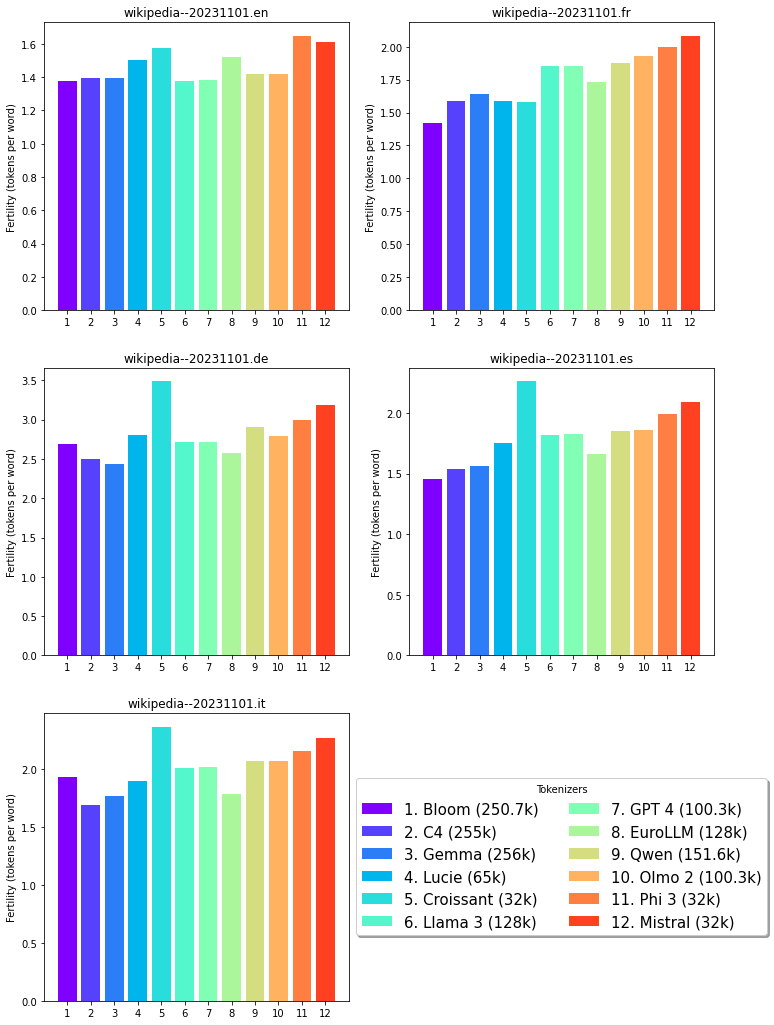

In [12]:
import datasets
import tqdm
import json
import os
import matplotlib.pyplot as plt

# Disable datasets progress bars
from datasets.utils.logging import disable_progress_bar
disable_progress_bar()

# Cache benchmark results (that are long to compute)
_file_to_cache_results = "fertilities.json"
if "fertilities" not in globals():
    fertilities = {}
    if _file_to_cache_results and os.path.exists(_file_to_cache_results):
        with open(_file_to_cache_results, "r") as f:
            fertilities = json.load(f)

def challenge_fertility(
    tokenizers=my_tokenizers,
    configs = [
        # ["OpenLLM-France/wikipedia", lan]
        ["wikimedia/wikipedia", "20231101." + lan]
        for lan in ["en", "fr", "de", "es", "it"]
    ],
    max_docs = 1000,
    max_characters = 1e6,
    do_not_recompute=True,
    ):
    """
    Measure the fertility of tokenizers on some dataset(s).

    Args:
    - tokenizers: list of tokenizers to test
    - configs: list of configurations to test. Those are positional arguments for datasets.load_dataset().
    - max_docs: number of documents to test
    - do_not_recompute: if True, will not recompute fertilities if already computed
    """
    global fertilities

    config_names = ["/".join(config) for config in configs]

    for i_config, (args, config) in enumerate(zip(configs, config_names)):
        # Do not recompute what was already computed
        if do_not_recompute and all(tokenizer in fertilities.get(config, {}) for tokenizer in tokenizers):
            continue
        already_computed_tokenizers = set(fertilities.get(config, {}))

        # Load the dataset
        dataset = datasets.load_dataset(*args, split="train", streaming=True)
        num_words = {}
        num_tokens = {}
        # Accumulate statistics
        num_characters = 0
        for i_doc, doc in enumerate(tqdm.tqdm(dataset, desc=f"Testing {len(tokenizers) - len(already_computed_tokenizers)} tokenizers on {config}", total=max_docs)):
            if i_doc >= max_docs:
                break
            if num_characters >= max_characters:
                break
            text = doc["text"]
            num_characters += len(text)
            for tokenizer in tokenizers:
                if do_not_recompute and tokenizer in already_computed_tokenizers:
                    continue
                num_words[tokenizer] = num_words.get(tokenizer, 0) + len(text.split())
                tokens = encode_decode(tokenizer, text, add_special_tokens=False)[0]
                num_tokens[tokenizer] = num_tokens.get(tokenizer, 0) + len(tokens)
        fertilities[config] = fertilities.get(config, {})
        for tokenizer in num_words:
            fertilities[config][tokenizer] = num_tokens[tokenizer] / num_words[tokenizer]
        
        # Save results on disk
        if _file_to_cache_results:
            tmp_file = _file_to_cache_results + ".tmp"
            with open(tmp_file, "w") as f:
                json.dump(fertilities, f, indent=2)
            os.replace(tmp_file, _file_to_cache_results)

    # Plot
    num_cols = 2
    num_rows = (len(configs)+1)//num_cols
    if len(configs) % 2 == 0:
        num_rows += 1
    colors = [plt.cm.rainbow(i / len(tokenizers)) for i in range(len(tokenizers))]

    # Sort tokenizers by increasing fertility
    tokenizers = sorted(
        tokenizers,
        key=lambda t: sum(fertilities[config][t] for config in config_names[:2])
    )

    plt.figure(figsize=(12, 6*num_rows))

    # Print one plot per configuration
    for i_config, config in enumerate(config_names):
        fert = fertilities[config]
        plt.subplot(num_rows, num_cols, i_config+1)
        for i, (tokenizer, color) in enumerate(zip(tokenizers, colors)):
            plt.bar([i+1], [fert[tokenizer]], color=color)
        plt.title("/".join(config.split("/")[1:]).replace("/", "--"))
        plt.ylabel("Fertility (tokens per word)")
        plt.xticks([i+1 for i in range(len(tokenizers))])
    
    # Custom legend
    plt.subplot(num_rows, num_cols, len(configs)+1)
    for i, (tokenizer, color) in enumerate(zip(tokenizers, colors)):
        plt.bar([0], [0], color=color, label=f"{i+1}. {tokenizer} ({vocabulary_size(tokenizer, True)})")
    plt.legend(fancybox=True, shadow=True, title="Tokenizers", loc='center', fontsize=15, ncol=min(2, len(tokenizers)))
    plt.axis("off")

tokenizers_to_bench = [
    "GPT 4",
    "Gemma",
    "Phi 3",
    "Mistral",
    "Llama 3",
    "Qwen",
    "Bloom",
    "Croissant",
    "EuroLLM",
    "Lucie",
    "C4",
    "Olmo 2",
]

challenge_fertility(tokenizers_to_bench)

## 🚧 Padding

Work in progress


In [15]:
llama_tokenizer = load_tokenizer_with_cache("meta-llama/Llama-3.1-8B-Instruct")
lucie_tokenizer = load_tokenizer_with_cache("Lucie")
print(llama_tokenizer.padding_side)
print(lucie_tokenizer.padding_side)

right
left
